In [4]:
import seaborn as sns
import pandas as pd

In [4]:
df = pd.read_csv("./uploaded_files/test_2/data.csv")

In [5]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


<Axes: xlabel='date', ylabel='meantemp'>

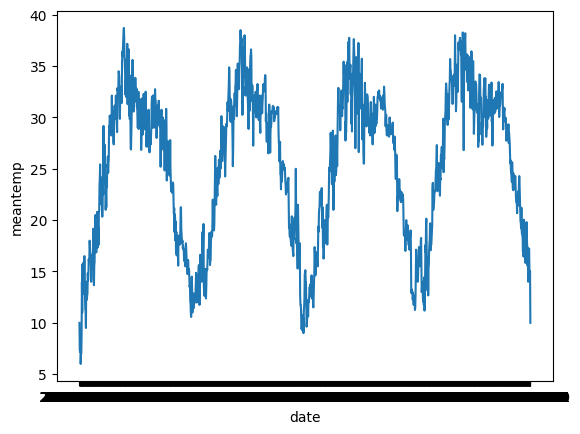

In [6]:
sns.lineplot(x="date", y="meantemp", data=df)

<Axes: xlabel='date', ylabel='humidity'>

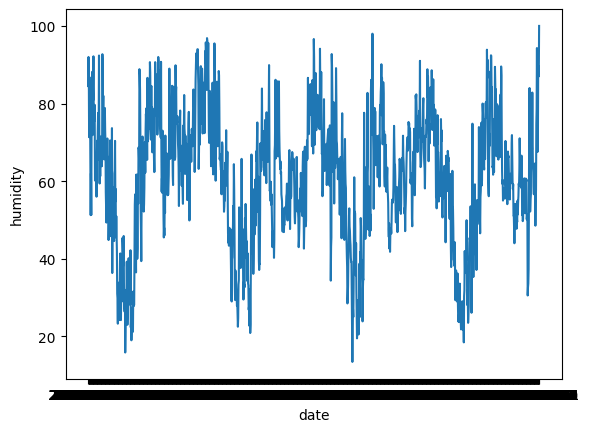

In [7]:
sns.lineplot(x="date", y="humidity", data=df)

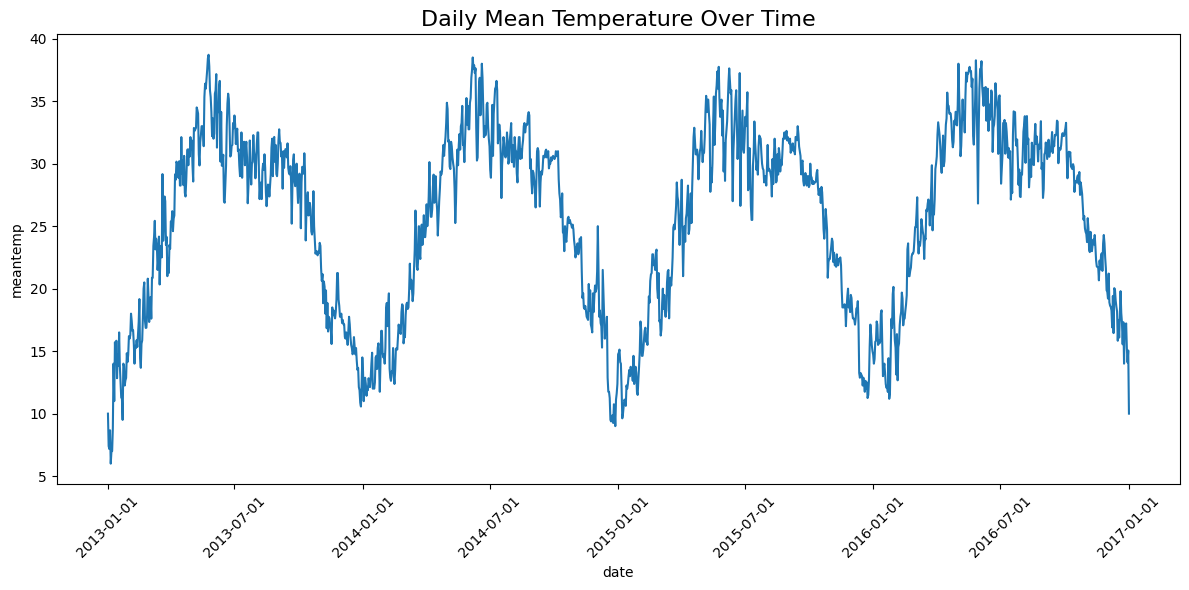

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x="date", y="meantemp", data=df)

ax.set_title("Daily Mean Temperature Over Time", fontsize=16)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate date labels
plt.xticks(rotation=45)

# Tight layout to avoid cutoff
plt.tight_layout()
plt.show()


In [18]:
# Save to file
output_path = "./uploaded_files/test_2/temperature_plot.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.close(fig)  # Close this specific figure

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# Ensure date column is datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")
# df = df.dropna(subset=["date", "meantemp"])  # Drop rows with NaT or NaN if needed

# Create a figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot using Seaborn on the given axes
sns.lineplot(ax=ax, x="date", y="meantemp", data=df)

# Add title and format x-axis
ax.set_title("Daily Mean Temperature Over Time", fontsize=16)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Save to file
output_path = "./uploaded_files/test_2/temperature_plot_2.png"
plt.tight_layout()
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.close(fig)  # Close this specific figure


In [27]:
df.dtypes

date            datetime64[ns]
meantemp               float64
humidity               float64
wind_speed             float64
meanpressure           float64
dtype: object

In [31]:
for col_name, typ in df.dtypes.items():
    print(col_name)
    print(typ)
    print(pd.api.types.is_numeric_dtype(typ))
    print("-----")


date
datetime64[ns]
False
-----
meantemp
float64
True
-----
humidity
float64
True
-----
wind_speed
float64
True
-----
meanpressure
float64
True
-----


In [1]:
def get_date_field(fields):
    """
    get_date_field
    return the field that store the date 
    """
    possible_date_field = ['date', 'timestamp', 'timestamps', 'Date']
    for field_name in possible_date_field:
        if field_name in fields.keys():
            return field_name

In [5]:
df = pd.read_csv("./uploaded_files/test_5/data.csv")

In [6]:
"""
Fields
"""
fields = {}
fields_type = df.dtypes
fields_name = fields_type.index
num_total_fields = len(fields_name)

for i in range (0, num_total_fields):
    fields[fields_name[i]] = str(fields_type.iloc[i])

"""
Start and End
"""
date = {}
date_field = get_date_field(fields)

start_date = min(df[date_field])
end_date = max(df[date_field])

In [7]:
start_date

'1/10/2017 16:00:00'

In [8]:
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [10]:
from dateutil.relativedelta import relativedelta
import datetime

date_time_common_formats = [
    "%m/%d/%Y %H:%M:%S",  # e.g., "1/10/2017 16:00:00"
    "%m/%d/%Y %H:%M",     # e.g., "1/10/2017 16:00"
    "%Y-%m-%d %H:%M:%S",  # e.g., "2023-01-25 10:30:00"
    "%Y-%m-%d %H:%M",     # e.g., "2023-01-25 10:30"
    "%Y-%m-%dT%H:%M:%S",  # e.g., "2023-01-25T10:30:00" (ISO 8601 without timezone)
    "%Y-%m-%dT%H:%M:%SZ", # e.g., "2023-01-25T10:30:00Z" (ISO 8601 UTC)
    "%Y-%m-%d",           # e.g., "2023-01-25"
    "%m/%d/%Y",           # e.g., "01/25/2023"
    "%d-%m-%Y",           # e.g., "25-01-2023"
    "%b %d %Y %H:%M:%S",  # e.g., "Jan 25 2023 10:30:00"
    "%d %b %Y %H:%M:%S",  # e.g., "25 Jan 2023 10:30:00"
    "%A, %B %d, %Y %H:%M:%S", # e.g., "Wednesday, January 25, 2023 10:30:00"
]

In [11]:
def get_date(date):
    for fmt in date_time_common_formats:
        try:
            datetime_object = datetime.datetime.strptime(date, fmt)
            return datetime_object
        except ValueError:
            continue
    


In [13]:
df["new_date"] = df[date_field].map(lambda x: get_date(x))

In [15]:
df[date_field]

0        4/1/2015 16:00:00
1        4/2/2015 16:00:00
2        4/6/2015 16:00:00
3        4/7/2015 16:00:00
4        4/8/2015 16:00:00
               ...        
1506    3/25/2021 16:00:00
1507    3/26/2021 16:00:00
1508    3/29/2021 16:00:00
1509    3/30/2021 16:00:00
1510    3/31/2021 16:00:00
Name: Date, Length: 1511, dtype: object

In [ ]:
min(df["new_date"])

0      2015-04-01 16:00:00
1      2015-04-02 16:00:00
2      2015-04-06 16:00:00
3      2015-04-07 16:00:00
4      2015-04-08 16:00:00
               ...        
1506   2021-03-25 16:00:00
1507   2021-03-26 16:00:00
1508   2021-03-29 16:00:00
1509   2021-03-30 16:00:00
1510   2021-03-31 16:00:00
Name: new_date, Length: 1511, dtype: datetime64[ns]

In [16]:
min(df["new_date"])

Timestamp('2015-04-01 16:00:00')

In [17]:
max(df["new_date"])

Timestamp('2021-03-31 16:00:00')